In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
from google.colab import files
uploaded=files.upload()

Saving Salary_Data (1).csv to Salary_Data (1) (1).csv


In [9]:
df=pd.read_csv('Salary_Data (1) (1).csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [11]:
df.isnull().sum()

,0
YearsExperience,0
Salary,0


In [12]:
df.cov()

,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


In [13]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


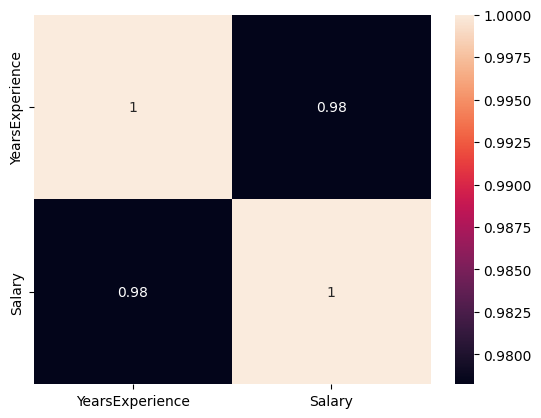

In [14]:
sns.heatmap(df.corr(),annot=True)
plt.show()

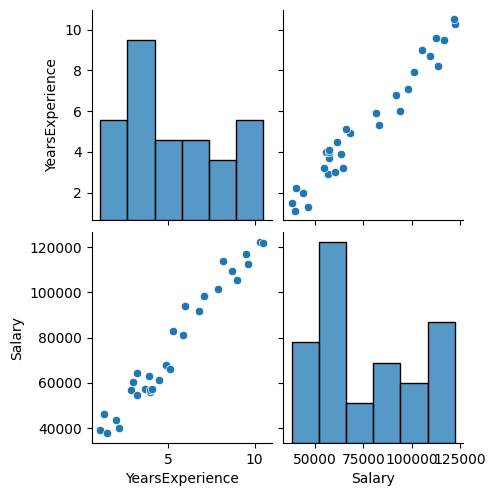

In [15]:
sns.pairplot(df)
plt.show()

In [16]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [17]:
X=df['YearsExperience']
y=df['Salary']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression()

In [23]:
y_pred=lr.predict(X_test.values.reshape(-1,1))

In [24]:
lr.intercept_

np.float64(25321.583011776813)

In [25]:
lr.coef_

array([9423.81532303])

In [28]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
print(mse)
r2_score=r2_score(y_test,y_pred)
print(r2_score)

49830096.85590839
0.9024461774180497


In [29]:
y_train_pred=lr.predict(X_train.values.reshape(-1,1))
y_train_pred

array([122386.880839  , 107308.77632215,  63016.8443039 ,  35687.77986711,
        46053.97672244,  73383.04115923,  52650.64744857,  63959.2258362 ,
        63016.8443039 ,  99769.72406372,  37572.54293172,  39457.30599632,
       110135.92091906,  44169.21365784,  92230.6718053 , 114847.82858057,
        80922.09341766, 124271.6439036 ,  89403.52720839,  55477.79204548,
        62074.4627716 ,  67728.75196542,  81864.47494996,  53593.02898087])

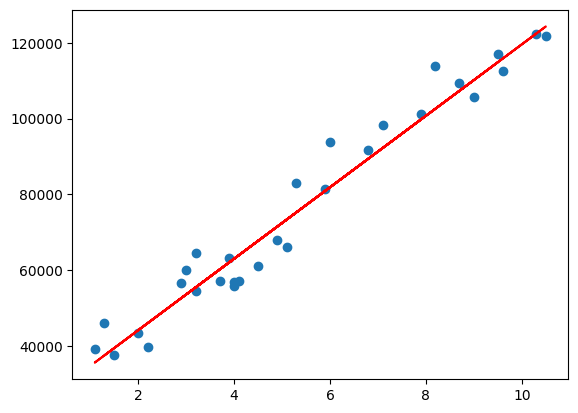

In [36]:
plt.scatter(X,y,label='original data')
plt.plot(X_train,y_train_pred,color='red')